In [1]:
import numpy as np
import biom
import pandas as pd
import random
import matplotlib.pyplot as plt
from biom.util import biom_open
from sklearn.preprocessing import scale
%matplotlib inline


### load and preprocess data

In [2]:
#define directory to read/write files
read_path = '/Users/bec5786/Desktop/temp/tempted_in'
save_path = '/Users/bec5786/Desktop/temp/tempted_out'

In [3]:
# load data
cohort = 'Vital'
mf = pd.read_csv('{}/{}_CTF_sample_metadata.tsv'.format(read_path, cohort), sep='\t', index_col=0)
table_biom = biom.load_table('{}/{}_raw2.hd5.biom'.format(read_path, cohort))
table_df = table_biom.to_dataframe()
table_array = table_df.values

In [4]:
display(mf.head())
table_biom

,SubjectID,SUBJID,SUBJIDO_A,ARM,ARMCD,GAGEBRTH,GAGECM,SEXN,SEX,BRTHYR,...,MBMI_M05_bins,MBMI_M06_bins,MBMI_D56_bins,HAZ_M0_binary_bins,WHZ_M0_binary_bins,HAZ_M3_binary_bins,WHZ_M3_binary_bins,HAZ_M6_binary_bins,WHZ_M6_binary_bins,Timepoint
SampleID,,,,,,,,,,,,,,,,,,,,,
A10016-LW,EMP18:AG:1563,98,AG:LW:0172,Nutrient supplement+Ex.BreastFeed,2,273,Estimated from LMP,1,Male,2018,...,18.5-25,18.5-25,18.5-25,NaN,NaN,below -1,below -1,above -1,below -1,1
A20016-LW,EMP18:AG:1563,98,AG:LW:0172,Nutrient supplement+Ex.BreastFeed,2,273,Estimated from LMP,1,Male,2018,...,18.5-25,18.5-25,18.5-25,NaN,NaN,below -1,below -1,above -1,below -1,2
A10122-LW,EMP31:AG:12989,186,AG:LW:0697,Nutrient supplement+Ex.BreastFeed+AZT,3,257,Estimated from LMP,2,Female,2019,...,18.5-25,18.5-25,18.5-25,above -1,below -1,above -1,below -1,below -1,below -1,1
A20122-LW,EMP31:AG:12989,186,AG:LW:0697,Nutrient supplement+Ex.BreastFeed+AZT,3,257,Estimated from LMP,2,Female,2019,...,18.5-25,18.5-25,18.5-25,above -1,below -1,above -1,below -1,below -1,below -1,2
A10130-LW,EMP31:AG:13452,189,AG:LW:0725,Control,1,269,Estimated from ultrasound,2,Female,2019,...,18.5-25,18.5-25,18.5-25,above -1,below -1,above -1,below -1,above -1,below -1,1


60608 x 300 <class 'biom.table.Table'> with 17379931 nonzero entries (95% dense)

In [5]:
mf[['SubjectID','Timepoint']].head()

,SubjectID,Timepoint
SampleID,,
A10016-LW,EMP18:AG:1563,1
A20016-LW,EMP18:AG:1563,2
A10122-LW,EMP31:AG:12989,1
A20122-LW,EMP31:AG:12989,2
A10130-LW,EMP31:AG:13452,1


In [6]:
table_df.head()

,A10016-LW,A20016-LW,A10122-LW,A20122-LW,A10130-LW,A20129-LW,A10048-LW,A20048-LW,A10406-LW,A20406-LW,...,A10031-LW,A20031-LW,A10117-LW,A20117-LW,A10124-LW,A20124-LW,A10046-LW,A20046-LW,A10119-LW,A20119-LW
rLC_pos_mtb_2172957,299.0,174.0,0.0,146.0,94.0,25.0,245.0,290.0,476.0,0.0,...,349.0,272.0,528.0,0.0,402.0,241.0,470.0,17.0,512.0,30.0
rLC_pos_mtb_8553707,176.0,248.0,432.0,340.0,227.0,293.0,325.0,299.0,320.0,425.0,...,301.0,312.0,263.0,172.0,471.0,357.0,330.0,302.0,350.0,286.0
rLC_pos_mtb_154232,57.0,47.0,233.0,0.0,130.0,187.0,103.0,196.0,79.0,0.0,...,52.0,66.0,53.0,0.0,136.0,0.0,0.0,0.0,80.0,0.0
rLC_pos_mtb_2328983,85.0,140.0,178.0,187.0,73.0,197.0,151.0,282.0,241.0,198.0,...,163.0,142.0,147.0,224.0,151.0,251.0,146.0,169.0,219.0,225.0
rLC_pos_mtb_2707705,44.0,221.0,138.0,264.0,264.0,27.0,134.0,0.0,119.0,129.0,...,251.0,124.0,55.0,156.0,262.0,187.0,135.0,146.0,204.0,305.0


In [7]:
print(table_df.isna().sum().sum())
print(table_df.isnull().sum().sum())
print(np.isnan(table_array).sum())

0
0
0


In [8]:
#step 1: imputation
random.seed(100)
#draw from unif distribution with low=min(table)/10 and high=min(table)
zero_len = len(table_array[table_array==0])
print("There are {} zeros in the array".format(zero_len))
min_value = table_biom.min().min()
print("The min value (excluding 0) in the array is {}".format(min_value))
rand_array = np.random.uniform(low=min_value/10, high=min_value, size=zero_len)
table_array[table_array==0] = rand_array
#sanity check
print(rand_array.min())
print(table_array.min())

There are 802469 zeros in the array
The min value (excluding 0) in the array is 1.0
0.10000153149709595
0.10000153149709595


In [9]:
#step 2: log10 transform the data
table_array = np.log10(table_array)
print(table_array)

[[ 2.47567119  2.24054925 -0.0855647  ...  1.23044892  2.70926996
   1.47712125]
 [ 2.24551267  2.39445168  2.63548375 ...  2.48000694  2.54406804
   2.45636603]
 [ 1.75587486  1.67209786  2.36735592 ... -0.04964255  1.90308999
  -0.57631529]
 ...
 [ 4.93662431  4.89805568  5.31926017 ...  5.19711508  5.78680251
   5.56387604]
 [ 5.78160173  5.55926488  6.01975334 ...  6.16943783  6.3239598
   6.40127747]
 [ 5.92212523  6.07632216  6.01610572 ...  5.84046493  6.12689343
   5.87443021]]


In [10]:
#step 3: scale the data row-wise (feature-level)
table_array_scaled = scale(table_array, axis=1)
print(table_array_scaled)

[[ 0.49567769  0.21310852 -2.58241148 ... -1.00082843  0.77641632
  -0.70437802]
 [-1.63622156 -0.56363189  1.17216921 ...  0.05249741  0.51383574
  -0.11775345]
 [ 0.3915836   0.31295446  0.96549094 ... -1.30299002  0.52975279
  -1.79730025]
 ...
 [-0.91253871 -1.00901516  0.04459523 ... -0.26094124  1.21411616
   0.65648287]
 [-0.44208512 -1.1704089   0.33804414 ...  0.82837568  1.33455372
   1.5878284 ]
 [-0.30333129  0.34059112  0.0891288  ... -0.64434261  0.55177546
  -0.50250447]]


In [11]:
#step 4: turn back into biom table
table_transformed = biom.Table(table_array_scaled, 
                               table_df.index, 
                               table_df.columns)
#save
with biom_open('{}/{}_transformed.biom'.format(read_path, cohort), 'w') as f:  
   table_transformed.to_hdf5(f, 'sapient-norm')

In [12]:
#save transformed table as csv
table_transformed.to_dataframe().to_csv('{}/{}_transformed.csv'.format(read_path, cohort))

### TEMPTED

In [13]:
from gemelli.tempted import (tempted_factorize, tempted)
#from gemelli.preprocessing import clr_transformation

In [14]:
print(table_transformed.to_dataframe().values[0:5,0:5])
print(table_transformed.to_dataframe().values.shape)

[[ 0.49567769  0.21310852 -2.58241148  0.12153582 -0.10827808]
 [-1.63622156 -0.56363189  1.17216921  0.42317468 -0.84035684]
 [ 0.3915836   0.31295446  0.96549094 -1.52436907  0.72764983]
 [-2.33373438 -0.71829948  0.05913384  0.21881889 -2.82644044]
 [-0.24428443  0.56799659  0.33099731  0.657473    0.657473  ]]
(60608, 300)


In [15]:
min_sample_count=table_transformed.sum(axis='sample').min()
min_feature_count=table_transformed.sum(axis='observation').min()
print("Mins:", min_sample_count, min_feature_count)

Mins: -74510.7148267182 -1.0193697275173719e-10


In [16]:
tempted_res = tempted(table=table_transformed.copy(), 
                      sample_metadata=mf,
                      individual_id_column='SubjectID', 
                      state_column='Timepoint',
                      min_sample_count=min_sample_count-1, #add -1 to avoid filtering error
                      min_feature_count=min_feature_count,
                      transformation=lambda x: x)

Prop explained: [0.0431711  0.03873929 0.02749961]
Prop explained argsort: [0 1 2]
Eigenvalues pre-sorting: [5445.41891853 5647.12267595 3471.41455452]
Eigenvalues post-sorting: [5445.41891853 5647.12267595 3471.41455452]


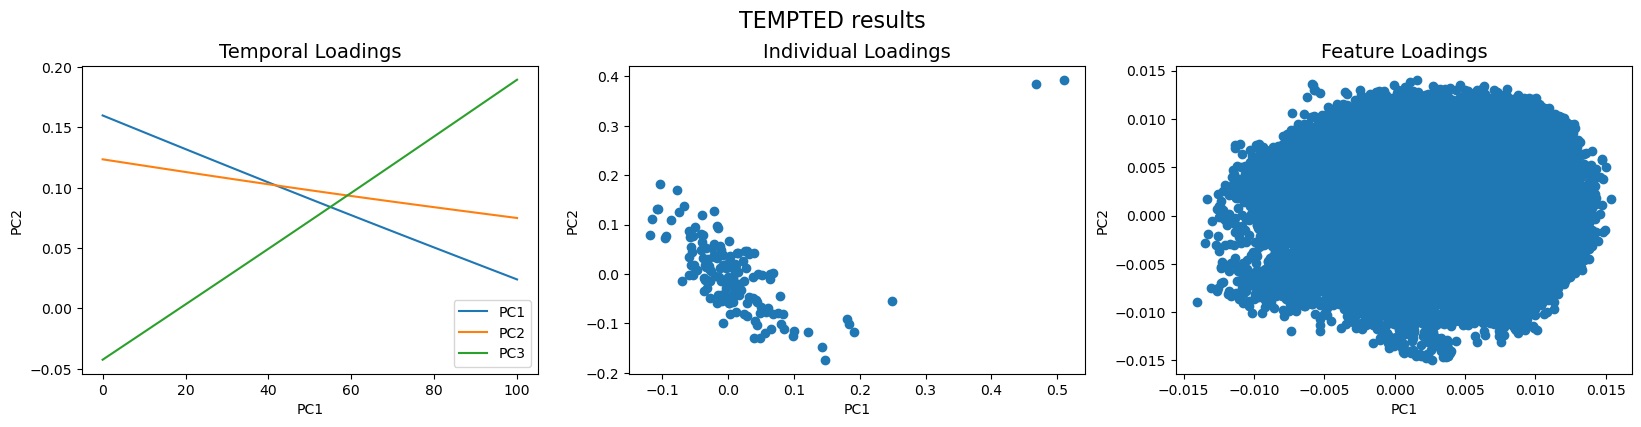

In [17]:
#feature loadings
comp1 = 'PC1'
comp2 = 'PC2'

fig, axn = plt.subplots(1, 3, figsize=(20, 4), sharey=False)
axn[0].plot(tempted_res[1][['PC1', 'PC2', 'PC3']])
axn[0].set_title('Temporal Loadings', fontsize=14)
axn[0].legend(['PC1', 'PC2', 'PC3'])
axn[1].scatter(tempted_res[0].samples[comp1],
               tempted_res[0].samples[comp2])
axn[1].set_title('Individual Loadings', fontsize=14)
axn[2].scatter(tempted_res[0].features[comp1],
               tempted_res[0].features[comp2])
axn[2].set_title('Feature Loadings', fontsize=14)
plt.suptitle('TEMPTED results', fontsize=16, y=1.02)
plt.setp(axn, xlabel=comp1.replace('_', ' '), 
         ylabel=comp2.replace('_', ' '))
plt.show()

In [18]:
# %%bash
# biom convert \
#   -i Misame_transformed.biom \
#   -o Misame_transformed.hd5.biom \
#   --to-hdf5

In [19]:
##save to dir
tempted_res[0].features.to_csv('{}/{}_subject_ordination.csv'.format(save_path, cohort))
tempted_res[1].to_csv('{}/{}_state_loadings.csv'.format(save_path, cohort))
# tempted_res[2].write('{}/{}_distance_matrix.qza'.format(save_path, cohort))
# tempted_res[3].to_csv('{}/{}_svd_center.csv'.format(save_path, cohort))